In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aoml-m-2-test-feb-2025/sample_submission.csv
/kaggle/input/aoml-m-2-test-feb-2025/train.csv
/kaggle/input/aoml-m-2-test-feb-2025/test.csv


In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# Load dataset
df = pd.read_csv('/kaggle/input/aoml-m-2-test-feb-2025/train.csv')  # change path if needed

# Drop UID
df = df.drop(columns=['uid'])

# Impute 'day' (categorical)
df['day'] = df['day'].fillna(df['day'].mode()[0])

# Impute numeric columns
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# One-hot encode 'day'
df = pd.get_dummies(df, columns=['day'], drop_first=True)

# Separate target and features
X = df.drop(columns=['output_electricity_generation'])
y = df['output_electricity_generation']  # You can also binarize it if required

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import matplotlib.pyplot as plt

# Define models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, random_state=42),
    "CatBoost": cb.CatBoostRegressor(verbose=0, random_state=42)
}

# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    mse = mean_squared_error(y_val, preds)
    results[name] = mse
    print(f"{name} MSE: {mse:.4f}")


RandomForest MSE: 8.8459
GradientBoosting MSE: 73.8894
XGBoost MSE: 27.0016
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2381
[LightGBM] [Info] Number of data points in the train set: 40320, number of used features: 12
[LightGBM] [Info] Start training from score 832.300201
LightGBM MSE: 17.9231
CatBoost MSE: 12.0016


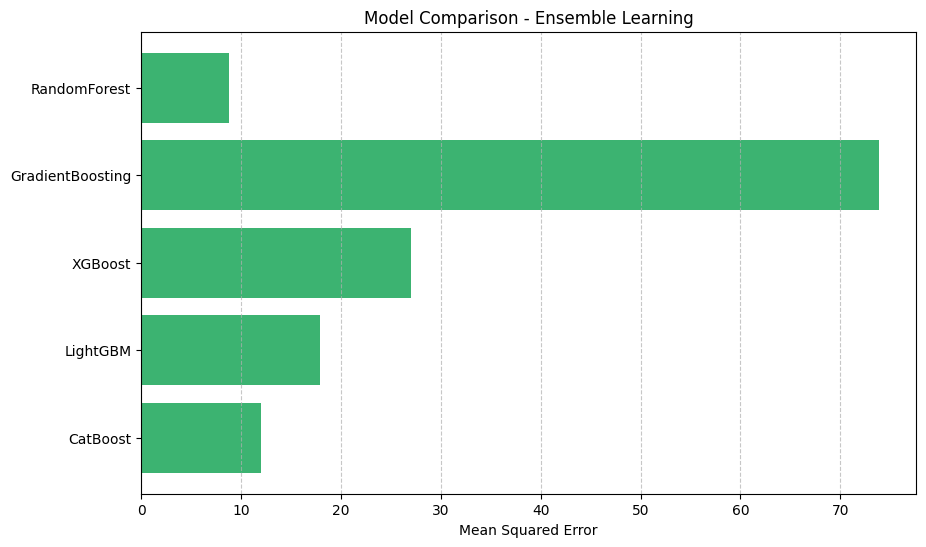

In [5]:
model_names = list(results.keys())
mse_scores = list(results.values())

plt.figure(figsize=(10, 6))
plt.barh(model_names, mse_scores, color='mediumseagreen')
plt.xlabel("Mean Squared Error")
plt.title("Model Comparison - Ensemble Learning")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


basic eda(for notebook to look better)
Display Data Insights Visually


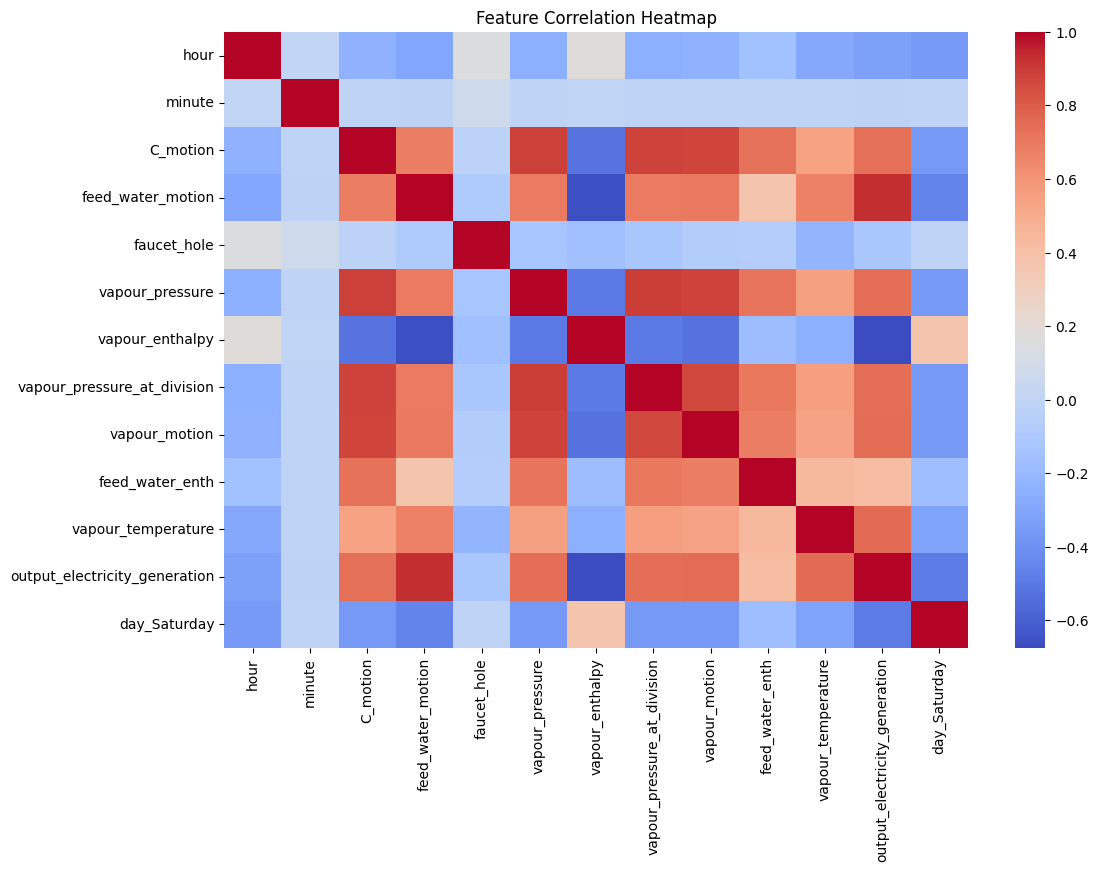

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
